<a href="https://colab.research.google.com/github/Manoj8965/kaggle-competions/blob/main/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns



## Import dataset

In [ ]:
data = pd.read_csv("/content/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Check Null values

In [ ]:

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Fill null values with mean 
# Drop unused columns from our dataset

In [ ]:

meanv=data["Age"].mean()
data["Age"].fillna(meanv, inplace=True)
meanv2=data["Fare"].mean()
data["Fare"].fillna(meanv2, inplace=True)
mann = data.drop(["Cabin"], inplace=True ,axis = 1)
mann = data.drop(["Name"],inplace=True ,axis = 1)
mann = data.drop(["Ticket"],inplace=True ,axis = 1)
mann = data.drop(["PassengerId"],inplace=True ,axis = 1)

# Again check null values

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


# First we import library sklearn and then . we put  preprocessing for LabelEncoder . and fit transform in our  dataset 

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()
y=np.array(data['Sex']).reshape(-1,1)
data['Sex']=le.fit_transform(y)
z=np.array(data['Embarked']).reshape(-1,1)
data['Embarked']=le.fit_transform(z)



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#check dataset
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


#use loop for convert all in integer 

In [ ]:
for i in data.columns:
  data[i]=data[i].astype(int)

#from sklearn import minkaxscaler .and fit fit transform data from dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
y=np.array(data['Fare']).reshape(-1,1)
data['Fare']=mms.fit_transform(y)
z=np.array(data['Age']).reshape(-1,1)
data['Age']=mms.fit_transform(z)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.447368,0,0,0.013672,1
1,1,3,0,0.618421,1,0,0.013672,2
2,0,2,1,0.815789,0,0,0.017578,1
3,0,3,1,0.355263,0,0,0.015625,2
4,1,3,0,0.289474,1,1,0.023438,2
...,...,...,...,...,...,...,...,...
413,0,3,1,0.394737,0,0,0.015625,2
414,1,1,0,0.513158,0,0,0.210938,0
415,0,3,1,0.500000,0,0,0.013672,2
416,0,3,1,0.394737,0,0,0.015625,2


# Data visualization from seaborn 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



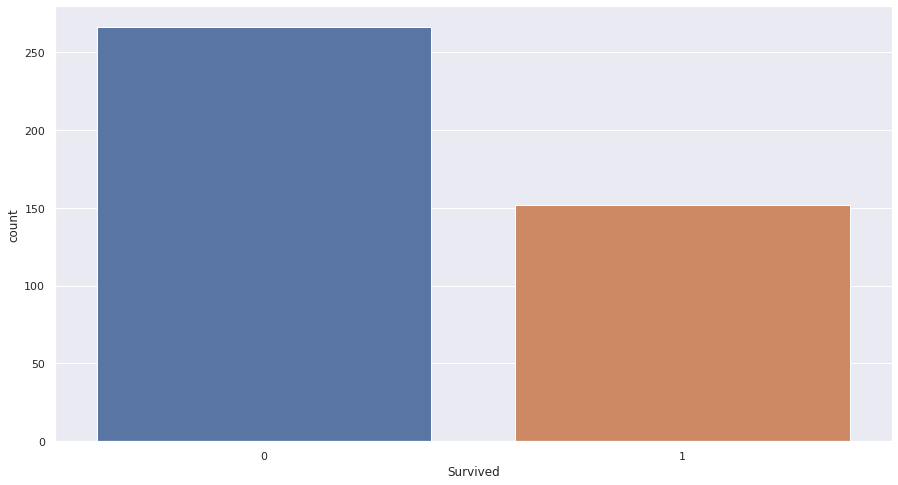

In [ ]:
# making a count plot for "Survived" column
data['Survived'].value_counts()
sns.countplot('Survived', data=data)

#train and test our data 

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['Survived'],axis=1)
Y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

#data from dataset apply  Linear Support Vector Classifier (SVC )algorithms train and test our data

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
preds = model.predict(X_test)
SVCAcc=accuracy_score(y_test, preds)*100

# import Logistic Regression algorithms for train and *test*

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(C=0.01, penalty='l1',solver='liblinear');
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
LRAcc=accuracy_score(y_test, y_pred_lr)*100

#apply kneighborsClassifier algorithms for train and test 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
KNNAcc=accuracy_score(y_test, y_pred_knn)*100

# Check all algorithms accuracy in a DataFrame


In [ ]:
d= {'Algorithm':['SVC', 'Logistic Regression', 'KNN'],
        'Accuracy':[SVCAcc,LRAcc,KNNAcc]}
df=pd.DataFrame(d)
df

,Algorithm,Accuracy
0,SVC,100.000000
1,Logistic Regression,53.571429
2,KNN,95.238095


# **Colclusion---**  As from the above table we can say that **KNN** gave us the best result as the data is not too overfitted nor underfitted.